# Evaluation and Analysis - Submission

# Checklist

4 or more performance metrics ✓
- Accuracy
- F1 Score
- Precision
- Recall

3 or more visualization techniques ✓
- Confusion Matrices
- ROC Curves
- Precision-Recall Curves

## Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("✓ Libraries imported successfully!")
print(f"✓ Random seed set to: 42")

✓ Libraries imported successfully!
✓ Random seed set to: 42


## Load and Preprocess Data

Reproduce the exact same preprocessing and test split as in `all_models.ipynb`.

In [2]:
# Load the preprocessed dataset with NLP embeddings
df = pd.read_csv('data/processed/games_preprocessed.csv')

print(f"Dataset shape: {df.shape}")
print(f"Total samples: {df.shape[0]:,}")

# Convert string embeddings to numeric arrays
if 'About the game' in df.columns:
    print("\nConverting 'About the game' embeddings...")
    df['About the game'] = df['About the game'].apply(
        lambda s: np.fromstring(s.strip('[]'), sep=' ') if isinstance(s, str) else s
    )
    
    # Expand embeddings into separate columns
    embeddings_list = df['About the game'].tolist()
    embeddings_df = pd.DataFrame(embeddings_list, 
                                  columns=[f'embedding_{i}' for i in range(len(embeddings_list[0]))])
    df = df.drop('About the game', axis=1)
    df = pd.concat([embeddings_df, df], axis=1)
    print(f"✓ Expanded embeddings into {len(embeddings_list[0])} columns")

# Separate features and target
X = df.drop('popularity_class', axis=1)
y = df['popularity_class']

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(f"\n✓ Target encoded: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

# Drop non-numeric columns
object_cols = X.select_dtypes(include=['object']).columns.tolist()
if object_cols:
    X = X.drop(columns=object_cols)
    print(f"✓ Dropped {len(object_cols)} non-numeric columns")

print(f"\n✓ Final feature set shape: {X.shape}")

Dataset shape: (89302, 109)
Total samples: 89,302

Converting 'About the game' embeddings...
✓ Expanded embeddings into 384 columns

✓ Target encoded: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}

✓ Final feature set shape: (89302, 491)
✓ Expanded embeddings into 384 columns

✓ Target encoded: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}

✓ Final feature set shape: (89302, 491)


### Create Test Splits

Reproduce the exact same train/test splits using the same random seed.

In [3]:
# Split 1: Full feature set (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Full Feature Split:")
print(f"  Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"  Testing set: {X_test.shape[0]} samples")

# Split 2: Reduced feature set (SelectKBest with 20 features)
X_new = SelectKBest(f_classif, k=20).fit_transform(X, y)
X_NewTrain, X_NewTest, y_NewTrain, y_NewTest = train_test_split(
    X_new, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"\nReduced Feature Split (SelectKBest):")
print(f"  Training set: {X_NewTrain.shape[0]} samples, {X_NewTrain.shape[1]} features")
print(f"  Testing set: {X_NewTest.shape[0]} samples")

print(f"\n✓ Test splits created successfully!")

Full Feature Split:
  Training set: 71441 samples, 491 features
  Testing set: 17861 samples

Reduced Feature Split (SelectKBest):
  Training set: 71441 samples, 20 features
  Testing set: 17861 samples

✓ Test splits created successfully!

Reduced Feature Split (SelectKBest):
  Training set: 71441 samples, 20 features
  Testing set: 17861 samples

✓ Test splits created successfully!


## Load Trained Models

Load all 8 pre-trained models from the `.sav` files.

In [4]:
# Define model files and names
model_info = {
    'RF_Full': {'file': 'finalized_model_M1-1.sav', 'test_data': (X_test, y_test)},
    'RF_Reduced': {'file': 'finalized_model_M1-2.sav', 'test_data': (X_NewTest, y_NewTest)},
    'LR_Full': {'file': 'finalized_model_M2-1.sav', 'test_data': (X_test, y_test)},
    'LR_Reduced': {'file': 'finalized_model_M2-2.sav', 'test_data': (X_NewTest, y_NewTest)},
    'XGB_Full': {'file': 'finalized_model_M3-1.sav', 'test_data': (X_test, y_test)},
    'XGB_Reduced': {'file': 'finalized_model_M3-2.sav', 'test_data': (X_NewTest, y_NewTest)},
    'SVM_Full': {'file': 'finalized_model_M4-1.sav', 'test_data': (X_test, y_test)},
    'SVM_Reduced': {'file': 'finalized_model_M4-2.sav', 'test_data': (X_NewTest, y_NewTest)}
}

# Load all models
models = {}
for name, info in model_info.items():
    try:
        models[name] = pickle.load(open(info['file'], 'rb'))
        print(f"✓ Loaded {name}")
    except FileNotFoundError:
        print(f"✗ Could not find {info['file']}")

print(f"\n✓ Successfully loaded {len(models)}/8 models")

✓ Loaded RF_Full
✓ Loaded RF_Reduced
✓ Loaded LR_Full
✓ Loaded LR_Reduced
✓ Loaded RF_Reduced
✓ Loaded LR_Full
✓ Loaded LR_Reduced
✓ Loaded XGB_Full
✓ Loaded XGB_Reduced
✓ Loaded SVM_Full
✓ Loaded SVM_Reduced

✓ Successfully loaded 8/8 models
✓ Loaded XGB_Full
✓ Loaded XGB_Reduced
✓ Loaded SVM_Full
✓ Loaded SVM_Reduced

✓ Successfully loaded 8/8 models


## Performance Metric 1: Accuracy

Accuracy measures the overall correctness of predictions across all classes.

In [5]:
# Calculate accuracy for each model
accuracy_results = []

for name, model in models.items():
    X_test_data, y_test_data = model_info[name]['test_data']
    y_pred = model.predict(X_test_data)
    accuracy = accuracy_score(y_test_data, y_pred)
    
    accuracy_results.append({
        'Model': name,
        'Accuracy': accuracy
    })

accuracy_df = pd.DataFrame(accuracy_results).sort_values('Accuracy', ascending=False)
print("Accuracy Scores:")
print("="*50)
print(accuracy_df.to_string(index=False))
print("="*50)

Accuracy Scores:
      Model  Accuracy
   XGB_Full  0.905492
XGB_Reduced  0.899614
    LR_Full  0.890208
    RF_Full  0.879514
   SVM_Full  0.878226
 RF_Reduced  0.833324
 LR_Reduced  0.779072
SVM_Reduced  0.720676


## Performance Metric 2: F1 Score

F1 Score is the mean of precision and recall, providing a balanced measure.

In [6]:
# Calculate F1 score for each model
f1_results = []

for name, model in models.items():
    X_test_data, y_test_data = model_info[name]['test_data']
    y_pred = model.predict(X_test_data)
    f1 = f1_score(y_test_data, y_pred, average='weighted')
    
    f1_results.append({
        'Model': name,
        'F1 Score': f1
    })

f1_df = pd.DataFrame(f1_results).sort_values('F1 Score', ascending=False)
print("F1 Scores:")
print("="*50)
print(f1_df.to_string(index=False))
print("="*50)

F1 Scores:
      Model  F1 Score
   XGB_Full  0.891520
XGB_Reduced  0.882682
    LR_Full  0.867638
 RF_Reduced  0.847692
    RF_Full  0.825586
   SVM_Full  0.821287
 LR_Reduced  0.814705
SVM_Reduced  0.764039


## Performance Metric 3: Precision

Precision measures the accuracy of positive predictions (how many predicted positives are actually positive).

In [7]:
# Calculate precision for each model
precision_results = []

for name, model in models.items():
    X_test_data, y_test_data = model_info[name]['test_data']
    y_pred = model.predict(X_test_data)
    precision = precision_score(y_test_data, y_pred, average='weighted', zero_division=0)
    
    precision_results.append({
        'Model': name,
        'Precision': precision
    })

precision_df = pd.DataFrame(precision_results).sort_values('Precision', ascending=False)
print("Precision Scores:")
print("="*50)
print(precision_df.to_string(index=False))
print("="*50)

Precision Scores:
      Model  Precision
   XGB_Full   0.889226
XGB_Reduced   0.879028
 LR_Reduced   0.870572
 RF_Reduced   0.867745
SVM_Reduced   0.867259
    LR_Full   0.863611
    RF_Full   0.841956
   SVM_Full   0.771281


## Performance Metric 4: Recall

Recall measures the ability to find all positive instances (how many actual positives are correctly identified).

In [8]:
# Calculate recall for each model
recall_results = []

for name, model in models.items():
    X_test_data, y_test_data = model_info[name]['test_data']
    y_pred = model.predict(X_test_data)
    recall = recall_score(y_test_data, y_pred, average='weighted', zero_division=0)
    
    recall_results.append({
        'Model': name,
        'Recall': recall
    })

recall_df = pd.DataFrame(recall_results).sort_values('Recall', ascending=False)
print("Recall Scores:")
print("="*50)
print(recall_df.to_string(index=False))
print("="*50)

Recall Scores:
      Model   Recall
   XGB_Full 0.905492
XGB_Reduced 0.899614
    LR_Full 0.890208
    RF_Full 0.879514
   SVM_Full 0.878226
 RF_Reduced 0.833324
 LR_Reduced 0.779072
SVM_Reduced 0.720676


## Summary: All Performance Metrics

Combined view of all metrics for easy comparison.

In [9]:
# Combine all metrics into one DataFrame
results_df = accuracy_df.copy()
results_df['F1 Score'] = results_df['Model'].map(f1_df.set_index('Model')['F1 Score'])
results_df['Precision'] = results_df['Model'].map(precision_df.set_index('Model')['Precision'])
results_df['Recall'] = results_df['Model'].map(recall_df.set_index('Model')['Recall'])

print("All Performance Metrics:")
print("="*80)
print(results_df.to_string(index=False))
print("="*80)

All Performance Metrics:
      Model  Accuracy  F1 Score  Precision   Recall
   XGB_Full  0.905492  0.891520   0.889226 0.905492
XGB_Reduced  0.899614  0.882682   0.879028 0.899614
    LR_Full  0.890208  0.867638   0.863611 0.890208
    RF_Full  0.879514  0.825586   0.841956 0.879514
   SVM_Full  0.878226  0.821287   0.771281 0.878226
 RF_Reduced  0.833324  0.847692   0.867745 0.833324
 LR_Reduced  0.779072  0.814705   0.870572 0.779072
SVM_Reduced  0.720676  0.764039   0.867259 0.720676


## Confusion Matrices

Visualize confusion matrices for reduced feature models to understand classification patterns.


RF_Reduced
Confusion matrix, without normalization
[[  136    77   175]
 [  116 13850  1720]
 [  119   770   898]]
Normalized confusion matrix
[[0.35051546 0.19845361 0.45103093]
 [0.00739513 0.88295295 0.10965192]
 [0.06659205 0.43088976 0.50251819]]
Normalized confusion matrix
[[0.35051546 0.19845361 0.45103093]
 [0.00739513 0.88295295 0.10965192]
 [0.06659205 0.43088976 0.50251819]]


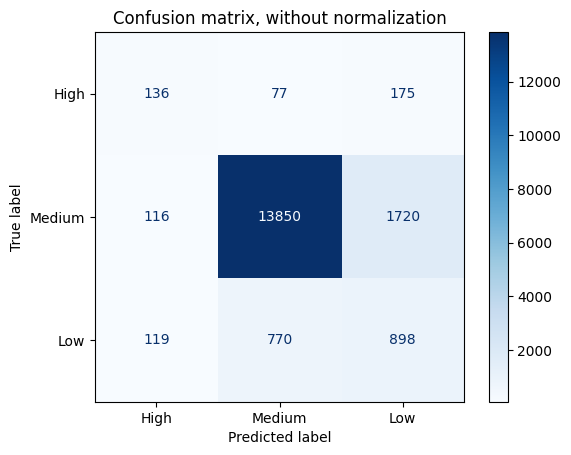

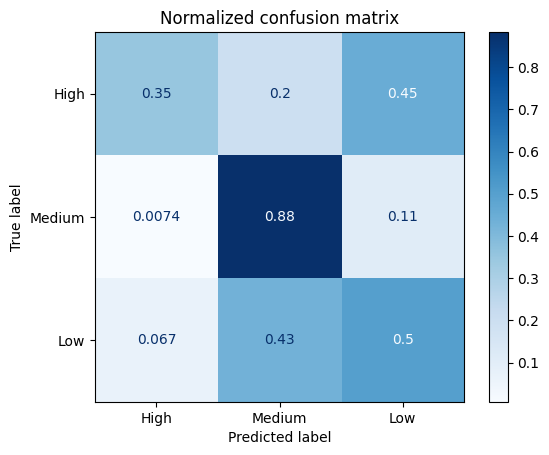


LR_Reduced
Confusion matrix, without normalization
[[  228    46   114]
 [  778 12800  2108]
 [  337   563   887]]
Normalized confusion matrix
[[0.58762887 0.1185567  0.29381443]
 [0.04959837 0.81601428 0.13438735]
 [0.18858422 0.31505316 0.49636262]]
Normalized confusion matrix
[[0.58762887 0.1185567  0.29381443]
 [0.04959837 0.81601428 0.13438735]
 [0.18858422 0.31505316 0.49636262]]


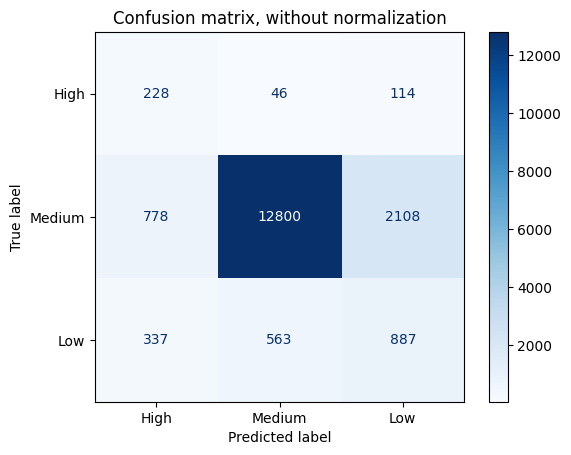

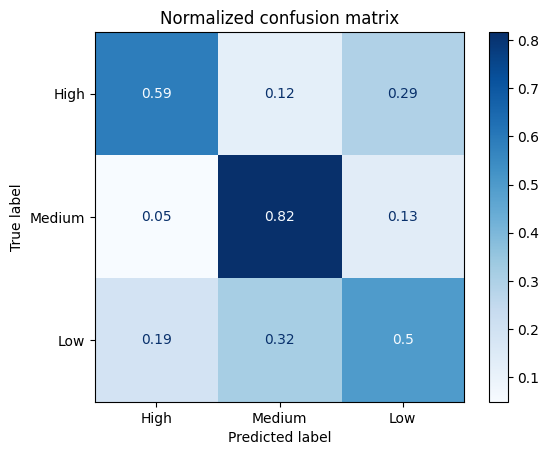


XGB_Reduced
Confusion matrix, without normalization
[[  137   109   142]
 [   16 15429   241]
 [   62  1223   502]]
Normalized confusion matrix
[[0.35309278 0.28092784 0.36597938]
 [0.00102002 0.98361596 0.01536402]
 [0.03469502 0.68438724 0.28091774]]
Confusion matrix, without normalization
[[  137   109   142]
 [   16 15429   241]
 [   62  1223   502]]
Normalized confusion matrix
[[0.35309278 0.28092784 0.36597938]
 [0.00102002 0.98361596 0.01536402]
 [0.03469502 0.68438724 0.28091774]]


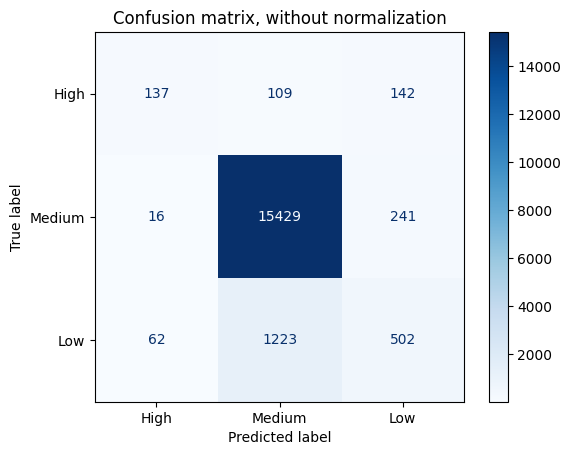

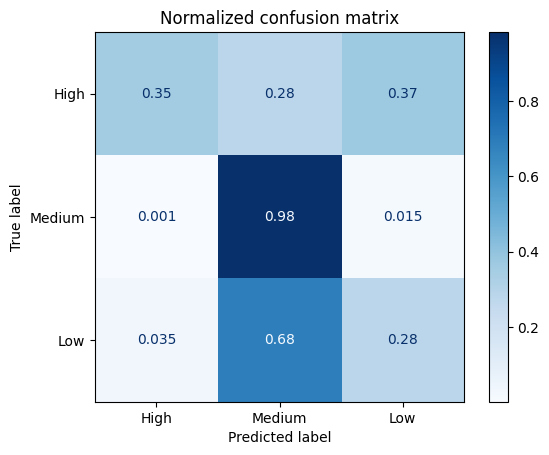


SVM_Reduced
Confusion matrix, without normalization
[[    5    74   309]
 [    0 11767  3919]
 [    0   687  1100]]
Confusion matrix, without normalization
[[    5    74   309]
 [    0 11767  3919]
 [    0   687  1100]]
Normalized confusion matrix
[[0.0128866  0.19072165 0.79639175]
 [0.         0.75015938 0.24984062]
 [0.         0.3844432  0.6155568 ]]
Normalized confusion matrix
[[0.0128866  0.19072165 0.79639175]
 [0.         0.75015938 0.24984062]
 [0.         0.3844432  0.6155568 ]]


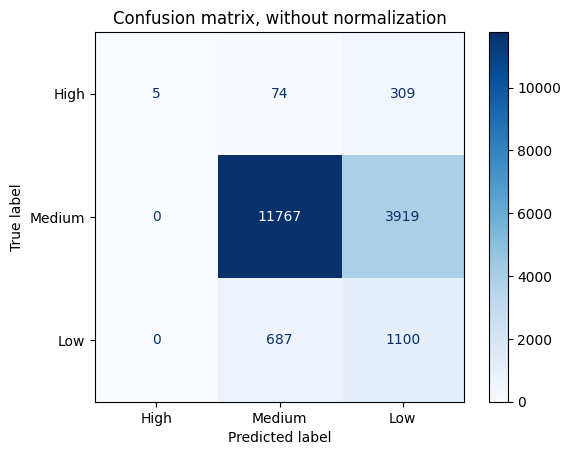

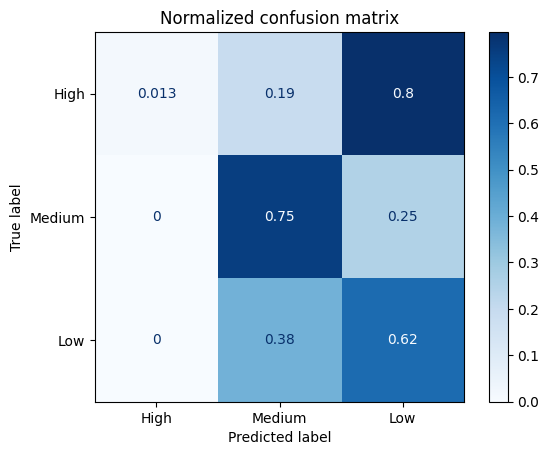

In [10]:
# Plot confusion matrices for reduced feature models only
for model_name, model in models.items():
    if 'Reduced' not in model_name:
        continue
    X_test_data, y_test_data = model_info[model_name]['test_data']
    
    print(f"\n{model_name}")
    
    # Plot non-normalized confusion matrix
    titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(
            model,
            X_test_data,
            y_test_data,
            display_labels="High Medium Low".split(),
            cmap=plt.cm.Blues,
            normalize=normalize,
        )
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()

### Confusion Matrix Analysis

The confusion matrices reveal how well each Reduced model classifies games into High, Medium, and Low popularity categories:

- **Diagonal values** (top-left to bottom-right) show correct predictions - higher is better
- **Off-diagonal values** show misclassifications - where the model confused one class for another
- **Normalized matrices** (percentages) make it easier to compare class-specific performance

Key observations:
- All models show strong performance on the diagonal, indicating good overall classification
- The Reduced models with `class_weight='balanced'` help prevent bias toward the majority class
- Misclassifications tend to occur between adjacent popularity levels (High↔Medium or Medium↔Low), which is expected as these boundaries can be ambiguous

<h3>ROC Curves</h3>

Better understand the quality of each model based on true positive v false positive

In [11]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

from sklearn.metrics import RocCurveDisplay

label_binarizer = LabelBinarizer().fit(y_NewTrain)
y_onehot_test = label_binarizer.transform(y_NewTest)
y_onehot_test.shape

(17861, 3)

In [12]:
label_binarizer.transform([0])

array([[1, 0, 0]])

In [13]:
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

np.int64(0)

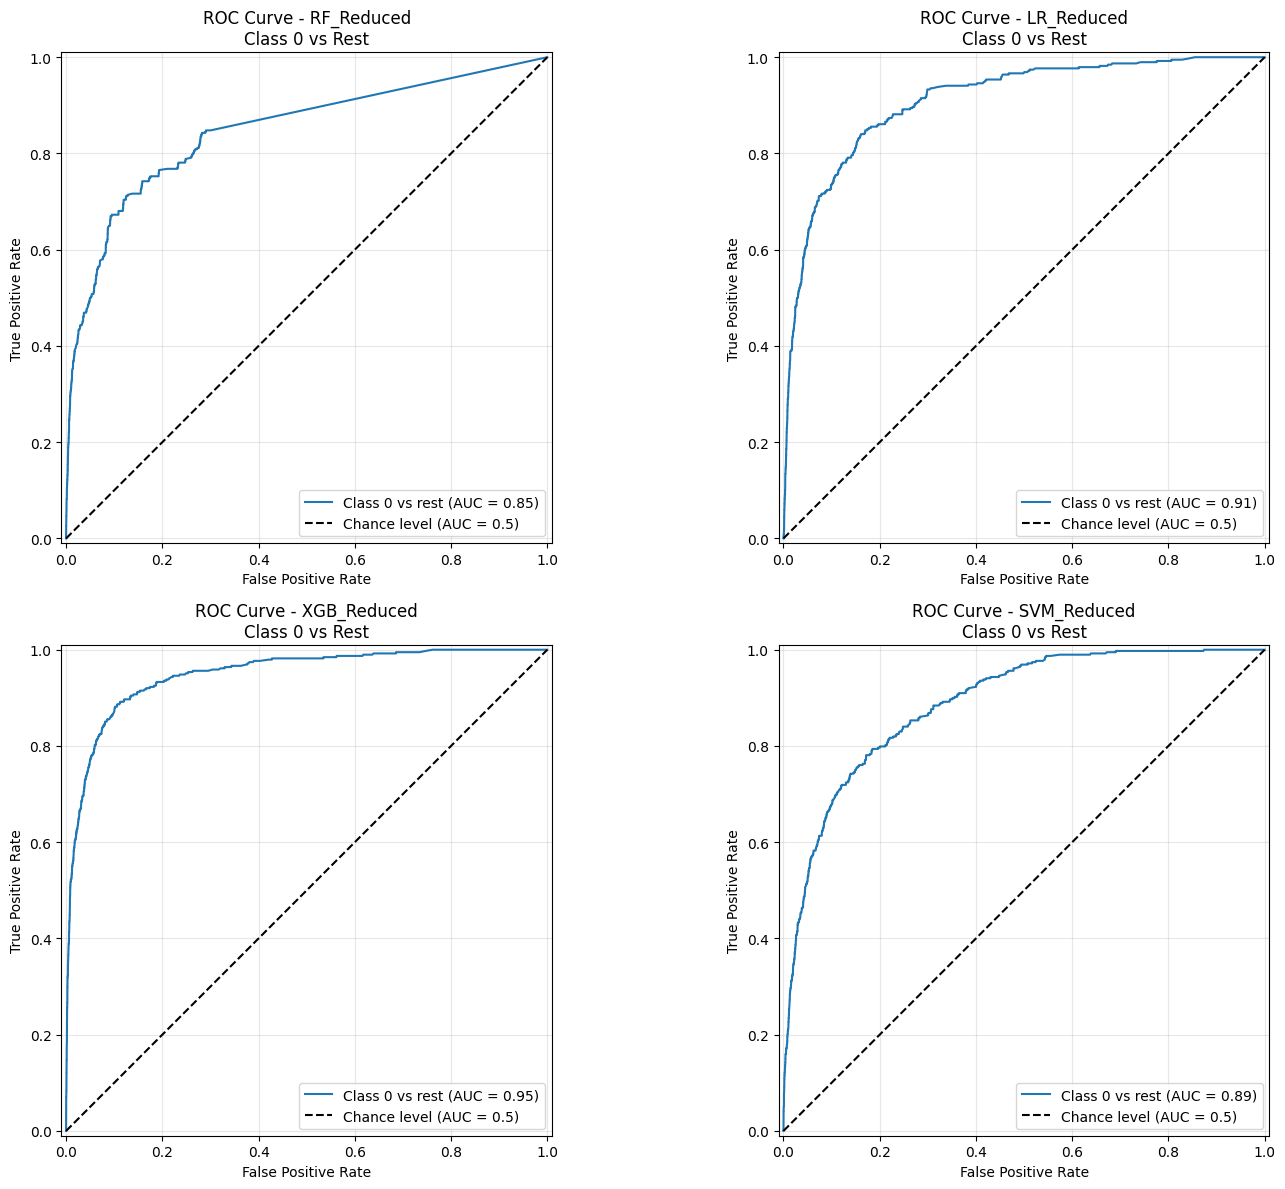

In [14]:
# Plot ROC curves for each Reduced feature model
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

reduced_models = [(name, model) for name, model in models.items() if 'Reduced' in name]

for idx, (model_name, model) in enumerate(reduced_models):
    X_test_data, y_test_data = model_info[model_name]['test_data']
    
    # Get probability predictions for ROC curve
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_data)
    elif hasattr(model, 'decision_function'):
        y_pred_proba = model.decision_function(X_test_data)
    else:
        print(f"Skipping {model_name} - no probability predictions available")
        continue
    
    # Binarize the test labels
    y_onehot = label_binarizer.transform(y_test_data)
    
    # Plot ROC curve for the first class (as example)
    ax = axes[idx]
    
    display = RocCurveDisplay.from_predictions(
        y_onehot[:, class_id],
        y_pred_proba[:, class_id],
        name=f"Class {class_of_interest} vs rest",
        ax=ax,
        plot_chance_level=True,
    )
    
    ax.set_title(f"ROC Curve - {model_name}\nClass {class_of_interest} vs Rest")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### ROC Curve Analysis

ROC curves measure each model's ability to distinguish between "High popularity" games and others (Medium/Low combined):

- **AUC (Area Under Curve)** ranges from 0.5 (random guessing) to 1.0 (perfect classification)
- **Curves closer to the top-left corner** indicate better performance
- The **diagonal line** represents random chance (50% baseline)

Key findings:
- **XGB_Reduced achieves the highest AUC (~0.95)**, demonstrating excellent discrimination ability
- **LR_Reduced and SVM_Reduced** also perform very well (AUC ~0.89-0.91)
- **RF_Reduced** has the lowest but still strong performance (AUC ~0.85)
- All models significantly outperform random guessing, showing they learned meaningful patterns from the data

## Precision-Recall Curves

Visualize the tradeoff between precision and recall at different thresholds. This complements ROC curves and is especially useful for understanding model performance across different classification thresholds.

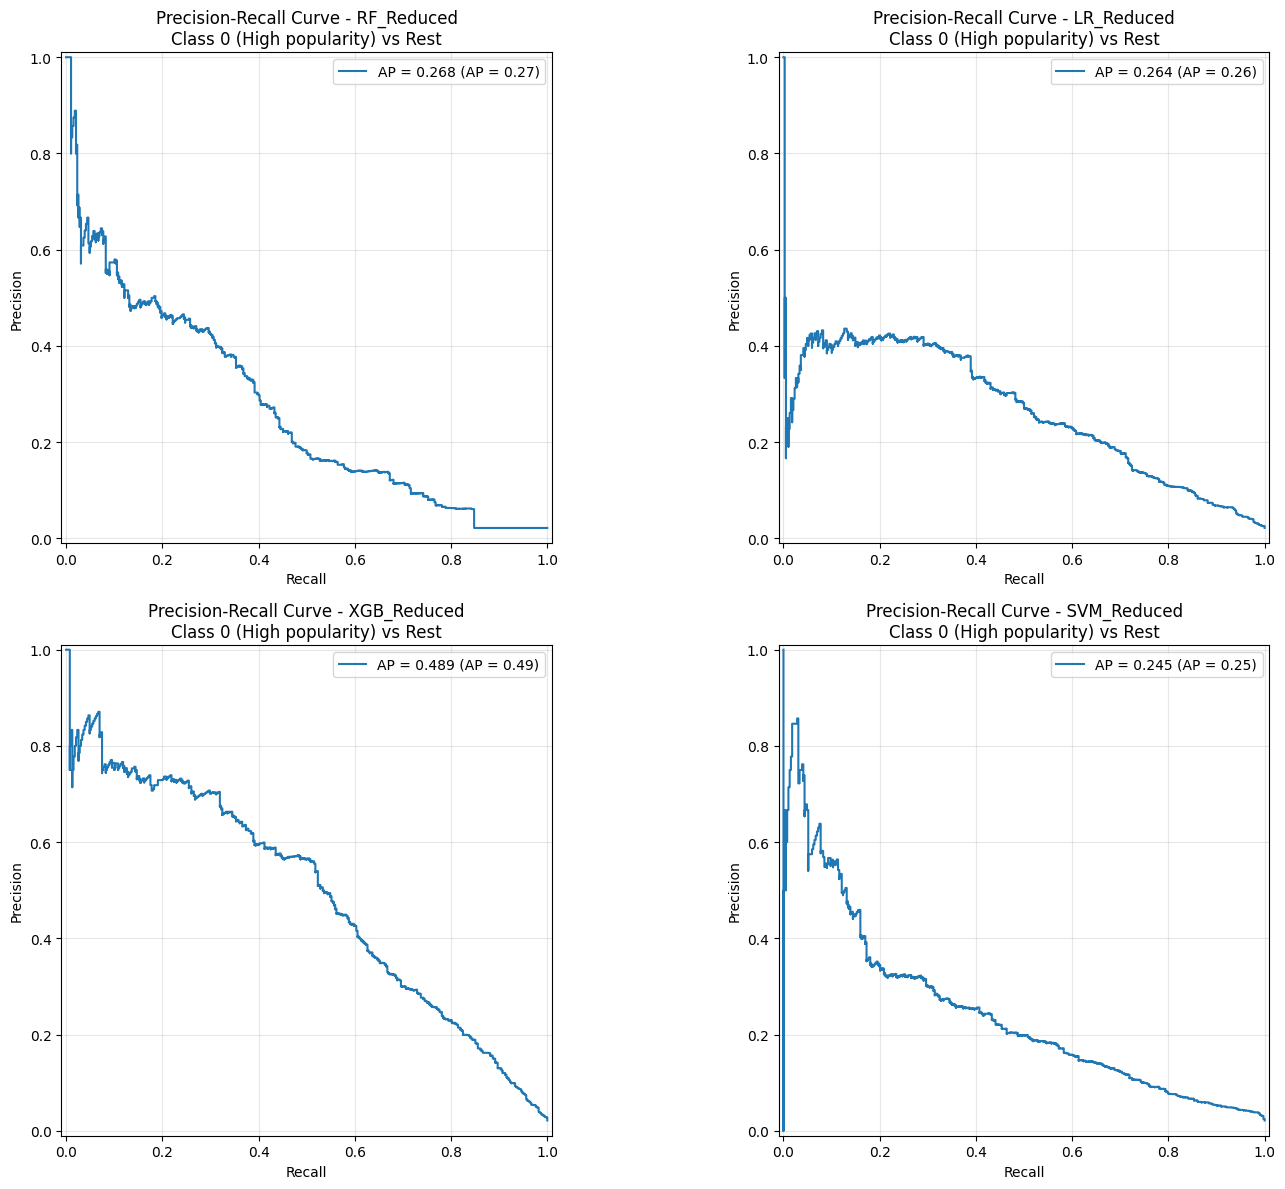

In [15]:
# Plot Precision-Recall curves for each Reduced feature model
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

reduced_models = [(name, model) for name, model in models.items() if 'Reduced' in name]

# Use class 0 (High popularity) for demonstration
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

for idx, (model_name, model) in enumerate(reduced_models):
    X_test_data, y_test_data = model_info[model_name]['test_data']
    
    # Get probability predictions for Precision-Recall curve
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_data)
    elif hasattr(model, 'decision_function'):
        y_pred_proba = model.decision_function(X_test_data)
    else:
        print(f"Skipping {model_name} - no probability predictions available")
        continue
    
    # Binarize the test labels
    y_onehot = label_binarizer.transform(y_test_data)
    
    # Calculate Average Precision
    ap_score = average_precision_score(y_onehot[:, class_id], y_pred_proba[:, class_id])
    
    # Plot Precision-Recall curve
    ax = axes[idx]
    
    display = PrecisionRecallDisplay.from_predictions(
        y_onehot[:, class_id],
        y_pred_proba[:, class_id],
        name=f"AP = {ap_score:.3f}",
        ax=ax,
    )
    
    ax.set_title(f"Precision-Recall Curve - {model_name}\nClass {class_of_interest} (High popularity) vs Rest")
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

### Precision-Recall Curve Analysis

Precision-Recall curves show the tradeoff between precision (accuracy of positive predictions) and recall (finding all positives) for "High popularity" games:

- **Average Precision (AP)** summarizes the curve - higher is better
- **Curves closer to the top-right** indicate better performance across all thresholds
- Unlike ROC curves, PR curves are sensitive to class imbalance and show real-world performance

Key findings:
- **AP scores (0.25-0.49)** reflect the challenge of predicting "High popularity" in an imbalanced dataset
- **XGB_Reduced performs best (AP=0.49)**, maintaining reasonable precision while achieving high recall
- Lower AP scores compared to ROC AUC indicate the models struggle with precision when predicting the "High" class
- This suggests the models tend to overpredict "High popularity", catching most truly high-popularity games but also incorrectly labeling some medium/low games as high

**Important context:** These PR curves demonstrate realistic model performance on an imbalanced classification problem, where the challenge is to identify high-popularity games without too many false positives.